### 라이브러리 호출

In [1]:
import pandas as pd

from post_eda import *

### validation prediction 경로 설정

In [2]:
# 경로 수정 !
PATH_NEW = "/opt/ml/level2_nlp_datacentric-nlp-12/prediction/validation_3103.csv"   # 분석할 validation prediction
PATH_BASE = "/opt/ml/level2_nlp_datacentric-nlp-12/prediction/validation_base.csv"  # 비교할 validation prediction

### validation prediction에 대한 분석

In [3]:
df_new = prepare_df(PATH_NEW)
df_base = prepare_df(PATH_BASE)

# df_total: 기준 validation과 새로운 validation을 비교하는 데이터프레임
df_total = compare_df(df_new, df_base)

# wrong_df: 잘못 예측한 값
df_wrong = df_new[df_new['target'] != df_new['pred']]


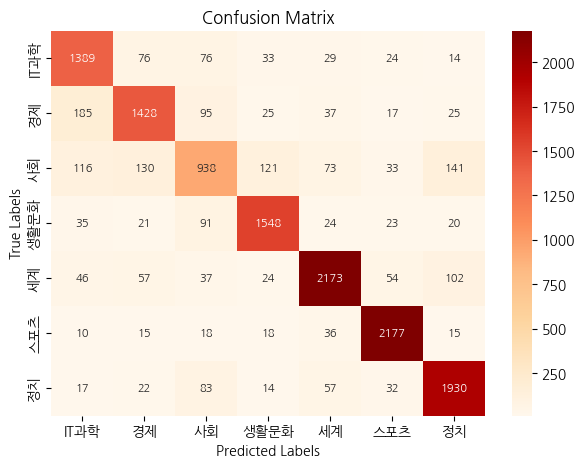

In [4]:
# confusion matrix graph (주대각선 포함)
cm_graph(df_new, correct=True)

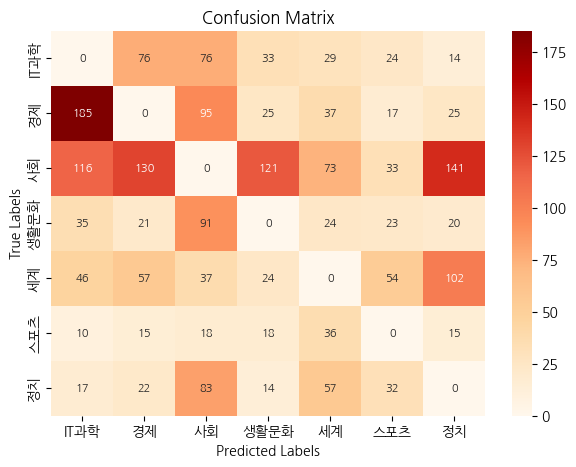

In [5]:
# confusion matrix graph (주대각선 미포함)
cm_graph(df_new, correct=False)

In [6]:
# confusion matrix dataframe
cm_dataframe(df_new, sort_column="recall")

,label,target,pred,TP,FP,FN,precision,recall,f1 score
2,사회,1552,1338,938,400,614,0.7010,0.6044,0.6491
1,경제,1812,1749,1428,321,384,0.8165,0.7881,0.8020
0,IT과학,1641,1798,1389,409,252,0.7725,0.8464,0.8078
4,세계,2493,2429,2173,256,320,0.8946,0.8716,0.8830
3,생활문화,1762,1783,1548,235,214,0.8682,0.8785,0.8733
6,정치,2155,2247,1930,317,225,0.8589,0.8956,0.8769
5,스포츠,2289,2360,2177,183,112,0.9225,0.9511,0.9366


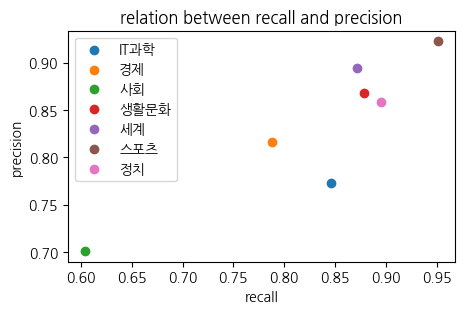

In [7]:
# 각 label의 precision과 recall 사이의 관계
precision_recall_graph(df_new)

In [8]:
# 전체 validation set에 대한 precision, recall, f1 score
total_metric(df_new)

,value
precision,0.8335
recall,0.8337
f1 score,0.8327


### 기준 validation prediction과 비교

In [9]:
compare_matrix(df_total)

,value
improved,175
worsen,259
both right,11408
both wrong,1862


In [10]:
# 개선된 부분: 현 실험에서는 맞췄지만 base에서는 틀린 데이터
improved = df_total[(df_total['target'] == df_total['pred_new']) & (df_total['target'] != df_total['pred_base'])]
improved

,ID,text_new,text_base,target,pred_new,pred_base
39,ynat-v1_train_28344,갤러리아면세점63 정식 개장…원스톱 관광·쇼핑,갤러리아면세점63 정식 개장…원스톱 관광·쇼핑,생활문화,생활문화,경제
53,ynat-v1_train_20861,설 세일에 부가세 환급까지…유커 씀씀이 커지나,설 세일에 부가세 환급까지…유커 씀씀이 커지나,경제,경제,생활문화
79,ynat-v1_train_04896,그래픽 2019년 예산 분야별 국회 증감 규모,그래픽 2019년 예산 분야별 국회 증감 규모,정치,정치,경제
132,ynat-v1_train_23264,美백악관 北 미사일도발·인권침해 깊은 우려,美백악관 北 미사일도발·인권침해 깊은 우려,정치,정치,세계
138,ynat-v1_train_15292,인제 자작나무 숲 입산통제…15일부터 2개월간,인제 자작나무 숲 입산통제…15일부터 2개월간,생활문화,생활문화,사회
...,...,...,...,...,...,...
13322,ynat-v1_train_32878,인터넷진흥원 전자영수증 등 신규 표준안 5건 승인,인터넷진흥원 전자영수증 등 신규 표준안 5건 승인,IT과학,IT과학,사회
13376,ynat-v1_train_01909,난감한 클럽 합동단속 점검팀,난감한 클럽 합동단속 점검팀,사회,사회,스포츠
13403,ynat-v1_train_34716,2019년 은행연합회 유공직원 시상식,2019년 은행연합회 유공직원 시상식,사회,사회,경제
13565,ynat-v1_train_00909,선주협회장 대부분 해운사 건실한데 리스크업종 낙인,선주협회장 대부분 해운사 건실한데 리스크업종 낙인,사회,사회,경제


In [11]:
improved['target'].value_counts()

target
사회      62
경제      31
정치      24
IT과학    21
생활문화    19
세계      10
스포츠      8
Name: count, dtype: int64

In [12]:
# 악화된 부분: 현 실험에서는 못맞췄지만 base에서는 맞춘 데이터
worsen = df_total[(df_total['target'] != df_total['pred_new']) & (df_total['target'] == df_total['pred_base'])]
worsen

,ID,text_new,text_base,target,pred_new,pred_base
0,ynat-v1_train_14823,인도 프리미엄폰 시장 잡아라…삼성·애플·샤오미 한판,인도 프리미엄폰 시장 잡아라…삼성·애플·샤오미 한판,IT과학,세계,IT과학
42,ynat-v1_train_21763,올림픽 평창 계촌5리 작은 마을서 지구촌 화합 파티,올림픽 평창 계촌5리 작은 마을서 지구촌 화합 파티,생활문화,스포츠,생활문화
63,ynat-v1_train_14423,손준호 전북과 1차 협상 결렬…계약기간·연봉 이견,손준호 전북과 1차 협상 결렬…계약기간·연봉 이견,스포츠,사회,스포츠
116,ynat-v1_train_26426,서울양양고속도로 개통 효과…피서객 10만여명 늘어,서울양양고속도로 개통 효과…피서객 10만여명 늘어,사회,생활문화,사회
141,ynat-v1_train_13908,안희정의 위력 1·2심 판단 존재…행사는 안돼→행사했다,안희정의 위력 1·2심 판단 존재…행사는 안돼→행사했다,정치,사회,정치
...,...,...,...,...,...,...
13570,ynat-v1_train_00663,美연준 美경제 완만한 성장 지속…단기 낙관론 유지,美연준 美경제 완만한 성장 지속…단기 낙관론 유지,세계,경제,세계
13651,ynat-v1_train_44566,그래픽 토지보상 예정 주택지구,그래픽 토지보상 예정 주택지구,경제,사회,경제
13652,ynat-v1_train_24813,中 北과 국경문제 등 논의 마쳐…북핵 거론 여부 언급 안해,中 北과 국경문제 등 논의 마쳐…북핵 거론 여부 언급 안해,세계,정치,세계
13653,ynat-v1_train_17316,세계 소비자 손바닥 장악한 최강자는 여전히 애플,세계 소비자 손바닥 장악한 최강자는 여전히 애플,경제,IT과학,경제


In [13]:
worsen['target'].value_counts()

target
세계      118
사회       38
IT과학     33
경제       24
생활문화     18
정치       16
스포츠      12
Name: count, dtype: int64

In [14]:
# 둘 다 틀린 부분
both_wrong = df_total[(df_total['target'] != df_total['pred_new']) & (df_total['target'] != df_total['pred_base'])]
both_wrong

,ID,text_new,text_base,target,pred_new,pred_base
22,ynat-v1_train_16298,네이마르바르사 소송전에도…MSN 트리오는 화기애애,네이마르바르사 소송전에도…MSN 트리오는 화기애애,세계,IT과학,IT과학
33,ynat-v1_train_34398,고침문화수어영상 크기·위치 맘대로…,고침문화수어영상 크기·위치 맘대로…,사회,생활문화,생활문화
36,ynat-v1_train_30501,미 H1B 비자 컴퓨터 관련 취업이 67% 차지,미 H1B 비자 컴퓨터 관련 취업이 67% 차지,경제,세계,세계
37,ynat-v1_train_37359,인공지능 기술로 복원된 대한민국 임시정부 기념사진,인공지능 기술로 복원된 대한민국 임시정부 기념사진,생활문화,IT과학,IT과학
67,ynat-v1_train_42348,MWC 중소기업진흥공단 청년창업사관학교,MWC 중소기업진흥공단 청년창업사관학교,경제,IT과학,사회
...,...,...,...,...,...,...
13663,ynat-v1_train_16231,KBO 신임 사무총장에 장윤호 스타뉴스 대표,KBO 신임 사무총장에 장윤호 스타뉴스 대표,정치,스포츠,스포츠
13679,ynat-v1_train_35727,배터리 최대 45% 절감 기술 KT 전국망에 첫 적용종합2보,배터리 최대 45% 절감 기술 KT 전국망에 첫 적용종합2보,경제,IT과학,IT과학
13683,ynat-v1_train_13854,게시판 NHN엔터 추석맞이 보드게임 4종 경품행사,게시판 NHN엔터 추석맞이 보드게임 4종 경품행사,경제,생활문화,생활문화
13695,ynat-v1_train_20595,부처별 연구비관리시스템 통합 첫발,부처별 연구비관리시스템 통합 첫발,IT과학,사회,사회


In [15]:
# 둘 다 맞춘 부분
both_right = df_total[(df_total['target'] == df_total['pred_new']) & (df_total['target'] == df_total['pred_base'])]
both_right

,ID,text_new,text_base,target,pred_new,pred_base
1,ynat-v1_train_14982,강릉 경포 정자에서 선비의 풍류를,강릉 경포 정자에서 선비의 풍류를,생활문화,생활문화,생활문화
2,ynat-v1_train_08697,배구 남자대표팀 감독 공모에 임도헌 코치 단독 지원,배구 남자대표팀 감독 공모에 임도헌 코치 단독 지원,스포츠,스포츠,스포츠
3,ynat-v1_train_13511,프로농구 다음 시즌부터 외국인 선수 키 200㎝ 이하로 제한,프로농구 다음 시즌부터 외국인 선수 키 200㎝ 이하로 제한,스포츠,스포츠,스포츠
4,ynat-v1_train_19878,유승민 공수처 안받을 이유없다…사법부 셀프개혁 안돼종합,유승민 공수처 안받을 이유없다…사법부 셀프개혁 안돼종합,정치,정치,정치
5,ynat-v1_train_16421,케이리그이 부산 EPL 경험한 베테랑 공격쑤 맥또날드 영입,케이리그이 부산 EPL 경험한 베테랑 공격쑤 맥또날드 영입,스포츠,스포츠,스포츠
...,...,...,...,...,...,...
13699,ynat-v1_train_06977,영상 트럼프 삼성은 관세 내지 않고 애플은 내…불공평,영상 트럼프 삼성은 관세 내지 않고 애플은 내…불공평,세계,세계,세계
13700,ynat-v1_train_26110,삼성 갤노트9 미국 컨슈머리포트 스마트폰 평가서 1위,삼성 갤노트9 미국 컨슈머리포트 스마트폰 평가서 1위,IT과학,IT과학,IT과학
13701,ynat-v1_train_44972,과방위 파행에 KT화재 청문회 무산 위기…여야 네 탓 공방종합,과방위 파행에 KT화재 청문회 무산 위기…여야 네 탓 공방종합,정치,정치,정치
13702,ynat-v1_train_37899,광주 원정 온 조폭 검거하는 경찰,광주 원정 온 조폭 검거하는 경찰,사회,사회,사회
